## Web Scrapping of Real Time  News Headlines using Finviz API

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


def get_parsed_news(tickers, n):
    # Define the URL for Finviz
    finviz_url = 'https://finviz.com/quote.ashx?t='

    news_tables = {}

    # Loop through each ticker to fetch news data
    for ticker in tickers:
        url = finviz_url + ticker

        # Make a request to the URL
        req = Request(url=url, headers={'user-agent': 'sentiment-app'})
        response = urlopen(req)
        html = BeautifulSoup(response, features='html.parser')

        # Find the news table
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table

    parsed_news = []

    # Loop through news tables and extract relevant information
    for ticker, news_table in news_tables.items():
        for row in news_table.findAll('tr'):
            anchor_tag = row.a
            time_data = row.td.text.strip().split()

            if anchor_tag and len(time_data) >= 2:
                date, time = time_data[0], time_data[1]
                title = anchor_tag.get_text()
                parsed_news.append([ticker, date, time, title])

    return parsed_news

In [2]:
# Define the list of tickers and number of recent news articles to retrieve
tickers = ['GOOG', 'AMZN', 'AAPL', 'MSFT', 'TSLA', 'NFLX', 'META', 'GME', 'PANW','BUD', 'WMT', 'W', 'NVDA']
n = 3

# Fetch parsed news data
parsed_news = get_parsed_news(tickers, n)

print(parsed_news)

[['GOOG', 'Aug-20-23', '02:55PM', 'Americas Tech Giants Rush to Comply With New Curbs in Europe'], ['GOOG', 'Aug-19-23', '07:04PM', 'Mohnish Pabrais 10 Biggest Investments in 10 Years'], ['GOOG', 'Aug-18-23', '08:50PM', "UPDATE 2-California regulator probes crashes involving GM's Cruise robotaxis"], ['GOOG', 'Aug-17-23', '07:51PM', "Netflix's Top Stories: Cloud Gaming and Stranger Things"], ['GOOG', 'Aug-16-23', '11:26PM', 'Alphabets Verily Plans Cost Cuts Amid Pressure on Other Bets to Rein In Spending'], ['GOOG', 'Aug-15-23', '06:01PM', 'Google to train 20,000 Nigerians in digital skills'], ['GOOG', 'Aug-14-23', '06:02PM', "Bill Ackman's Q2 2023 13F Filing Update: Key Trades and Portfolio Overview"], ['GOOG', 'Aug-13-23', '10:51PM', "Google-backed Anthropic raises $100 million from South Korea's SK Telecom"], ['AMZN', 'Aug-20-23', '02:35PM', 'Warren Buffetts 11 Growth Stock Picks'], ['AMZN', 'Aug-19-23', '11:15AM', '2 Artificial Intelligence (AI) Growth Stocks That Could Join Apple S

In [3]:
# Create DataFrame and calculate sentiment scores using VADER
vader = SentimentIntensityAnalyzer()
df = pd.DataFrame(parsed_news, columns=['ticker', 'date', 'time', 'title'])
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df['date'] = pd.to_datetime(df['date'])
print(df)

    ticker       date     time  \
0     GOOG 2023-08-20  02:55PM   
1     GOOG 2023-08-19  07:04PM   
2     GOOG 2023-08-18  08:50PM   
3     GOOG 2023-08-17  07:51PM   
4     GOOG 2023-08-16  11:26PM   
..     ...        ...      ...   
220   NVDA 2023-08-19  10:05AM   
221   NVDA 2023-08-18  07:10PM   
222   NVDA 2023-08-17  06:01PM   
223   NVDA 2023-08-16  09:02PM   
224   NVDA 2023-08-15  05:19PM   

                                                 title  compound  
0    Americas Tech Giants Rush to Comply With New C...    0.0000  
1    Mohnish Pabrais 10 Biggest Investments in 10 Y...    0.0000  
2    UPDATE 2-California regulator probes crashes i...    0.0000  
3    Netflix's Top Stories: Cloud Gaming and Strang...    0.2023  
4    Alphabets Verily Plans Cost Cuts Amid Pressure...   -0.5267  
..                                                 ...       ...  
220  What Nvidia, Intel, AMD, and TSMC Stock Invest...    0.0000  
221                       Why Are Stocks Moving Lower? 

In [4]:
df11 = pd.DataFrame(parsed_news, columns=['Stock', 'Date', 'Time', 'Headlines'])
df11.to_csv('../data/stock_headlines.csv', index=False)


In [5]:
df_ = pd.read_csv("../data/stock_headlines.csv")
df_

,Stock,Date,Time,Headlines
0,GOOG,Aug-20-23,02:55PM,Americas Tech Giants Rush to Comply With New C...
1,GOOG,Aug-19-23,07:04PM,Mohnish Pabrais 10 Biggest Investments in 10 Y...
2,GOOG,Aug-18-23,08:50PM,UPDATE 2-California regulator probes crashes i...
3,GOOG,Aug-17-23,07:51PM,Netflix's Top Stories: Cloud Gaming and Strang...
4,GOOG,Aug-16-23,11:26PM,Alphabets Verily Plans Cost Cuts Amid Pressure...
...,...,...,...,...
220,NVDA,Aug-19-23,10:05AM,"What Nvidia, Intel, AMD, and TSMC Stock Invest..."
221,NVDA,Aug-18-23,07:10PM,Why Are Stocks Moving Lower?
222,NVDA,Aug-17-23,06:01PM,"Are AI job wages of up to $900,000 justified?"
223,NVDA,Aug-16-23,09:02PM,NVIDIA's Top Stories: How It's Beating Competi...


## Performing Sentiment Analysis 


In [6]:
analyzer = SentimentIntensityAnalyzer()

columns = ['Ticker', 'Date', 'Time', 'Headline']
news = pd.DataFrame(parsed_news, columns=columns)
scores = news['Headline'].apply(analyzer.polarity_scores).tolist()

df_scores = pd.DataFrame(scores)
news = news.join(df_scores, rsuffix='_right')

In [7]:
# View Data 
news['Date'] = pd.to_datetime(news.Date).dt.date

unique_ticker = news['Ticker'].unique().tolist()
news_dict = {name: news.loc[news['Ticker'] == name] for name in unique_ticker}

values = []
for ticker in tickers: 
    dataframe = news_dict[ticker]
    dataframe = dataframe.set_index('Ticker')
    dataframe = dataframe.drop(columns = ['Headline'])
    print ('\n')
    print (dataframe.head())
    
    mean = round(dataframe['compound'].mean(), 2)
    values.append(mean)
    
df = pd.DataFrame(list(zip(tickers, values)), columns =['Ticker', 'Mean Sentiment']) 
df = df.set_index('Ticker')
df = df.sort_values('Mean Sentiment', ascending=False)
print ('\n')
print (df)



              Date     Time    neg    neu    pos  compound
Ticker                                                    
GOOG    2023-08-20  02:55PM  0.000  1.000  0.000    0.0000
GOOG    2023-08-19  07:04PM  0.000  1.000  0.000    0.0000
GOOG    2023-08-18  08:50PM  0.000  1.000  0.000    0.0000
GOOG    2023-08-17  07:51PM  0.000  0.795  0.205    0.2023
GOOG    2023-08-16  11:26PM  0.268  0.732  0.000   -0.5267


              Date     Time    neg    neu    pos  compound
Ticker                                                    
AMZN    2023-08-20  02:35PM  0.000  0.658  0.342    0.3818
AMZN    2023-08-19  11:15AM  0.000  0.639  0.361    0.7845
AMZN    2023-08-18  07:10PM  0.355  0.645  0.000   -0.2960
AMZN    2023-08-17  11:12PM  0.000  1.000  0.000    0.0000
AMZN    2023-08-16  08:42PM  0.000  0.444  0.556    0.8176


              Date     Time    neg    neu    pos  compound
Ticker                                                    
AAPL    2023-08-20  04:23PM  0.000  0.735  0.265  

In [8]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

class SentimentAnalysis:
    def __init__(self, tickers):
        self.tickers = tickers
        self.finwiz_url = 'https://finviz.com/quote.ashx?t='
        self.news_tables = {}
        self.parsed_news = []
        self.analyzed_news = None
        self.mean_sentiments = None

    def fetch_news_tables(self):
        for ticker in self.tickers:
            url = self.finwiz_url + ticker
            req = Request(url=url, headers={'user-agent': 'sentiment-app'})
            resp = urlopen(req)
            html = BeautifulSoup(resp, features="lxml")
            news_table = html.find(id='news-table')
            self.news_tables[ticker] = news_table

    def parse_news(self):
        for ticker, news_table in self.news_tables.items():
            for x in news_table.findAll('tr'):
                text1 = x.a
                if text1:
                    text = text1.get_text()
                    date_scrape = x.td.text.split()

                    if len(date_scrape) == 1:
                        time = date_scrape[0]
                    else:
                        date = date_scrape[0]
                        time = date_scrape[1]

                    self.parsed_news.append([ticker, date, time, text])

    def analyze_sentiment(self):
        analyzer = SentimentIntensityAnalyzer()

        columns = ['Ticker', 'Date', 'Time', 'Headline']
        news_df = pd.DataFrame(self.parsed_news, columns=columns)
        scores = news_df['Headline'].apply(analyzer.polarity_scores).tolist()

        df_scores = pd.DataFrame(scores)
        self.analyzed_news = news_df.join(df_scores, rsuffix='_right')
        self.analyzed_news['Date'] = pd.to_datetime(self.analyzed_news.Date).dt.date

    def calculate_mean_sentiment(self):
        sentiment_values = []

        for ticker in self.tickers:
            ticker_df = self.analyzed_news[self.analyzed_news['Ticker'] == ticker]
            mean_sentiment = round(ticker_df['compound'].mean(), 2)
            sentiment_values.append(mean_sentiment)

        mean_sentiments_df = pd.DataFrame(list(zip(self.tickers, sentiment_values)), columns=['Ticker', 'Mean Sentiment'])
        mean_sentiments_df = mean_sentiments_df.set_index('Ticker')
        mean_sentiments_df = mean_sentiments_df.sort_values('Mean Sentiment', ascending=False)
        self.mean_sentiments = mean_sentiments_df

    def run_sentiment_analysis(self):
        self.fetch_news_tables()
        self.parse_news()
        self.analyze_sentiment()
        self.calculate_mean_sentiment()


In [9]:
if __name__ == "__main__":

    tickers = ['GOOG', 'AMZN', 'AAPL', 'MSFT', 'TSLA', 'NFLX', 'META', 'GME', 'PANW','BUD', 'WMT', 'W', 'NVDA']
    sentiment_analysis = SentimentAnalysis(tickers)
    sentiment_analysis.run_sentiment_analysis()

    print("Analyzed News:")
    print(sentiment_analysis.analyzed_news)

    print("\nMean Sentiments:")
    print(sentiment_analysis.mean_sentiments)


Analyzed News:
     Ticker        Date     Time  \
0      GOOG  2023-08-20  02:55PM   
1      GOOG  2023-08-20  08:00AM   
2      GOOG  2023-08-20  07:05AM   
3      GOOG  2023-08-20  06:45AM   
4      GOOG  2023-08-19  07:04PM   
...     ...         ...      ...   
1295   NVDA  2023-08-15  03:33PM   
1296   NVDA  2023-08-15  03:26PM   
1297   NVDA  2023-08-15  03:02PM   
1298   NVDA  2023-08-15  02:38PM   
1299   NVDA  2023-08-15  02:07PM   

                                               Headline    neg    neu    pos  \
0     Americas Tech Giants Rush to Comply With New C...  0.000  1.000  0.000   
1     The double life of a Gen Z Google software eng...  0.119  0.881  0.000   
2     A Bull Market Is Coming: 1 Magnificent Artific...  0.000  0.522  0.478   
3     1 Life-Changing Stock Market Tip From Peter Ly...  0.000  0.860  0.140   
4     Mohnish Pabrais 10 Biggest Investments in 10 Y...  0.000  1.000  0.000   
...                                                 ...    ...    ...   

In [10]:
# Create DataFrame and calculate sentiment scores using VADER
vader = SentimentIntensityAnalyzer()
my_df = pd.DataFrame(parsed_news, columns=['ticker', 'date', 'time', 'title'])
my_df['compound'] = my_df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])
my_df['date'] = pd.to_datetime(my_df['date'])
print(my_df)

    ticker       date     time  \
0     GOOG 2023-08-20  02:55PM   
1     GOOG 2023-08-19  07:04PM   
2     GOOG 2023-08-18  08:50PM   
3     GOOG 2023-08-17  07:51PM   
4     GOOG 2023-08-16  11:26PM   
..     ...        ...      ...   
220   NVDA 2023-08-19  10:05AM   
221   NVDA 2023-08-18  07:10PM   
222   NVDA 2023-08-17  06:01PM   
223   NVDA 2023-08-16  09:02PM   
224   NVDA 2023-08-15  05:19PM   

                                                 title  compound  
0    Americas Tech Giants Rush to Comply With New C...    0.0000  
1    Mohnish Pabrais 10 Biggest Investments in 10 Y...    0.0000  
2    UPDATE 2-California regulator probes crashes i...    0.0000  
3    Netflix's Top Stories: Cloud Gaming and Strang...    0.2023  
4    Alphabets Verily Plans Cost Cuts Amid Pressure...   -0.5267  
..                                                 ...       ...  
220  What Nvidia, Intel, AMD, and TSMC Stock Invest...    0.0000  
221                       Why Are Stocks Moving Lower? 

/var/folders/b_/qpl3sp4n7_55mr2n2w20rmh40000gn/T/ipykernel_6141/4053790642.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

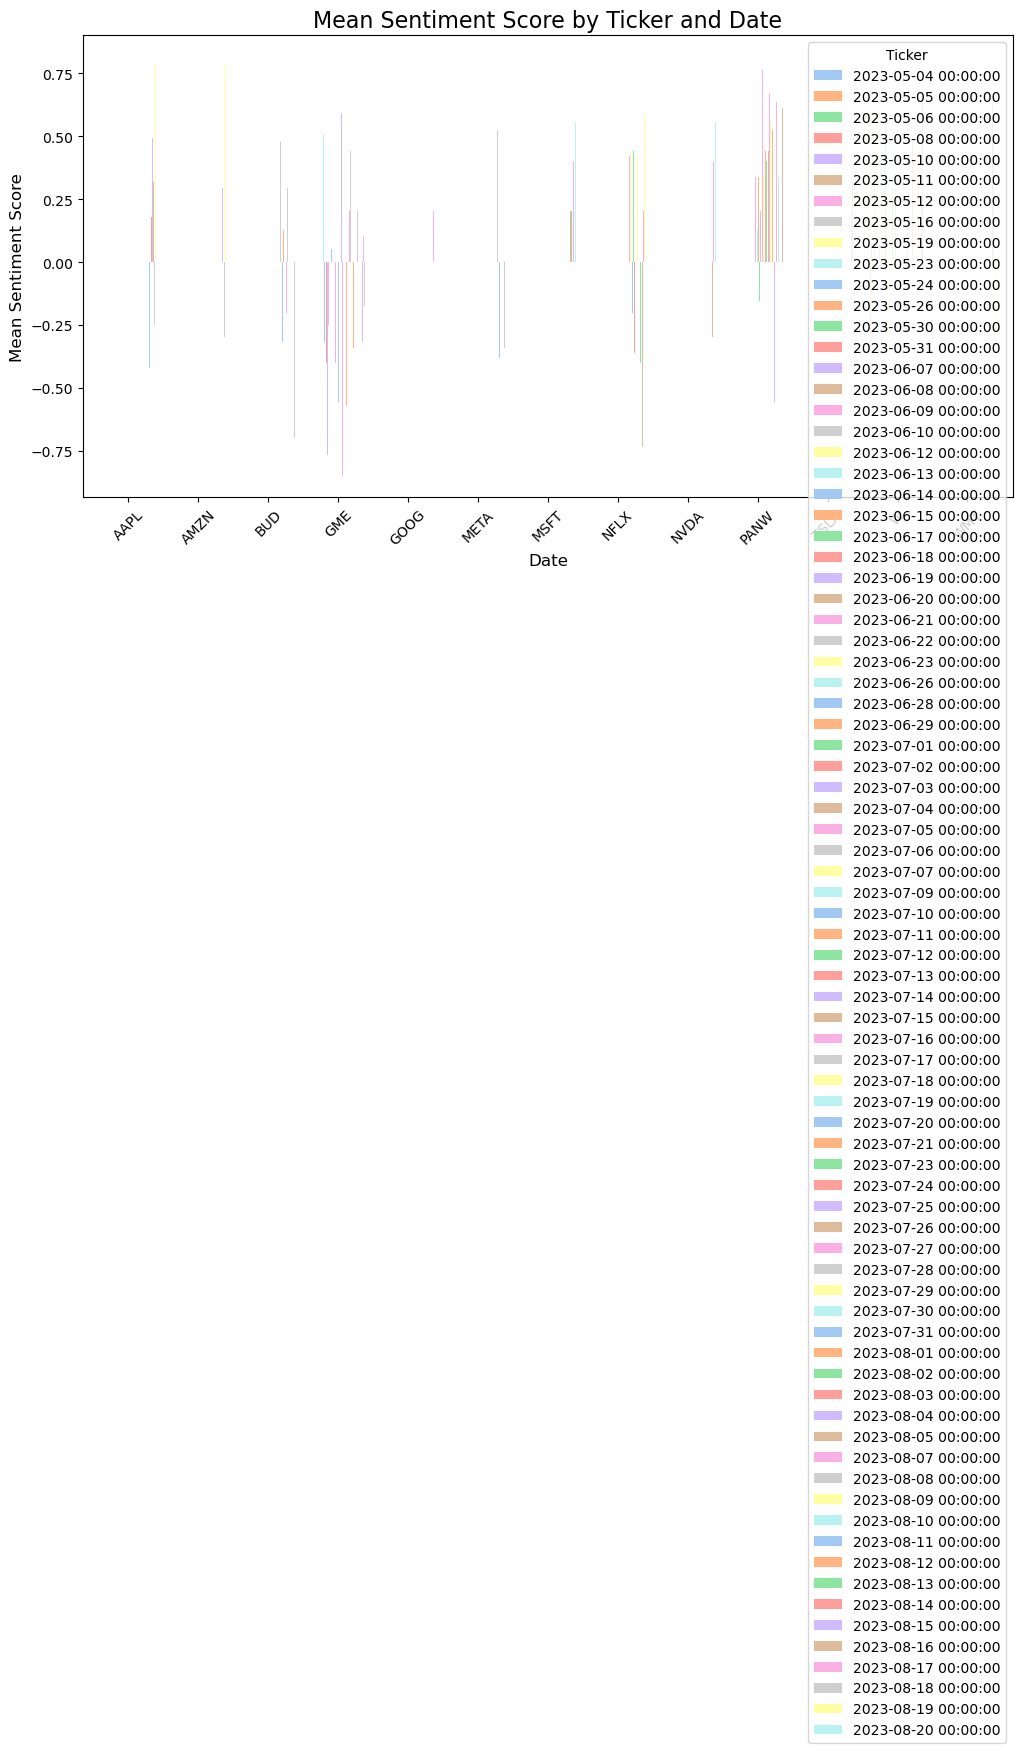

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a pleasing color palette
sns.set_palette("pastel")

# Calculate the mean sentiment scores for each ticker and date
mean_df = my_df.groupby(['ticker', 'date'])['compound'].mean().unstack()

# Create a figure and axes with better styling
plt.figure(figsize=(12, 6))
ax = mean_df.plot(kind='bar', figsize=(12, 6), width=0.8)

# Add title and labels
plt.title('Mean Sentiment Score by Ticker and Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.xticks(rotation=45)

# Customize legend
plt.legend(title='Ticker', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()
